In [1]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd 
import plotly.express as ps
import pandas as pd

# Shapefile for all country boundaries 

In [2]:
#make path for shape file
map_file = 'worldmap/world_shapefile.shp'

#read file through geopandas
map_df = gpd.read_file(map_file)
map_df.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


# Merged Dataframe from both csv files

In [9]:
#read files through geopandas
drinks = gpd.read_file('drinks.csv')
happy = gpd.read_file('HappinessAlcoholConsumption.csv')

#merge csvs
df = pd.merge(drinks, happy, how='outer', on=['Country', 'Spirit_PerCapita', 'Beer_PerCapita', 
                                              'Wine_PerCapita', 'geometry'])
df.head()

,Country,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,TotalLitres_PerCapita,geometry,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita
0,Afghanistan,0,0,0,0.0,None,NaN,NaN,NaN,NaN,NaN
1,Albania,89,132,54,4.9,None,Central and Eastern Europe,north,4.655,782,4.132
2,Algeria,25,0,14,0.7,None,NaN,NaN,NaN,NaN,NaN
3,Andorra,245,138,312,12.4,None,NaN,NaN,NaN,NaN,NaN
4,Angola,217,57,45,5.9,None,Sub-Saharan Africa,south,3.866,577,3.309


In [4]:
#specify for spirits only
df_spirit = df[['Country', 'Spirit_PerCapita']]
df_spirit.head()

,Country,Spirit_PerCapita
0,Afghanistan,0
1,Albania,132
2,Algeria,0
3,Andorra,138
4,Angola,57


# Merging the shapefile with plotting data

In [5]:
merged = map_df.set_index('NAME').join(df_spirit.set_index('Country'))
merged.head()

,FIPS,ISO2,ISO3,UN,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,Spirit_PerCapita
NAME,,,,,,,,,,,,
Antigua and Barbuda,AC,AG,ATG,28,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ...",NaN
Algeria,AG,DZ,DZA,12,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ...",0
Azerbaijan,AJ,AZ,AZE,31,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39...",46
Albania,AL,AL,ALB,8,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666...",132
Armenia,AM,AM,ARM,51,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555...",179


# Sprits Per Capita By Country - Map

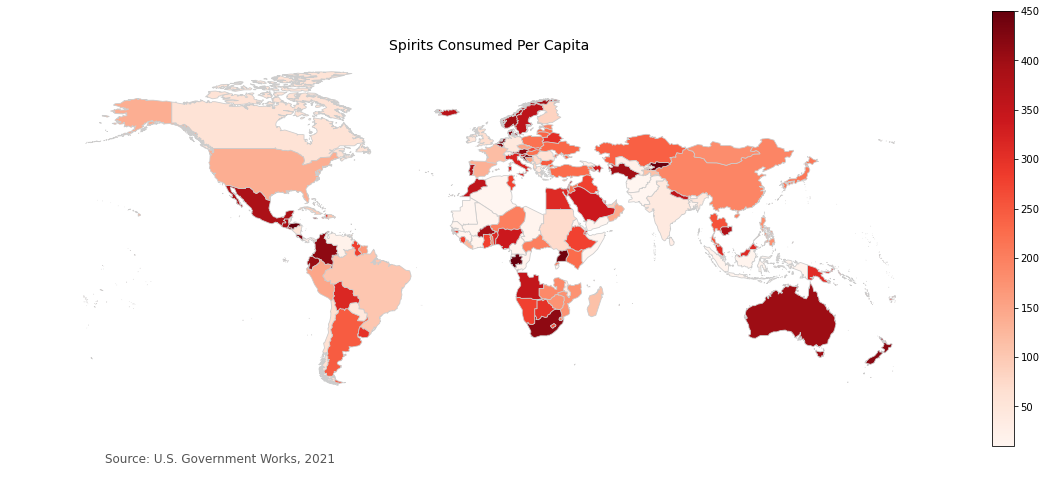

In [8]:
variable = 'Spirit_PerCapita'
# set the range for the choropleth
vmin, vmax = 10, 450

fig, ax = plt.subplots(1, figsize=(20, 8))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')
ax.set_title('Spirits Consumed Per Capita', fontdict={'fontsize': '14', 'fontweight' : '1'})
ax.annotate('Source: U.S. Government Works, 2021',xy=(0.1, .08), 
             xycoords='figure fraction', horizontalalignment='left', 
             verticalalignment='top', fontsize=12, color='#555555');
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
           
#fig.savefig('map_export.png', dpi=300)    

# Beer Per Capita By Country - Map

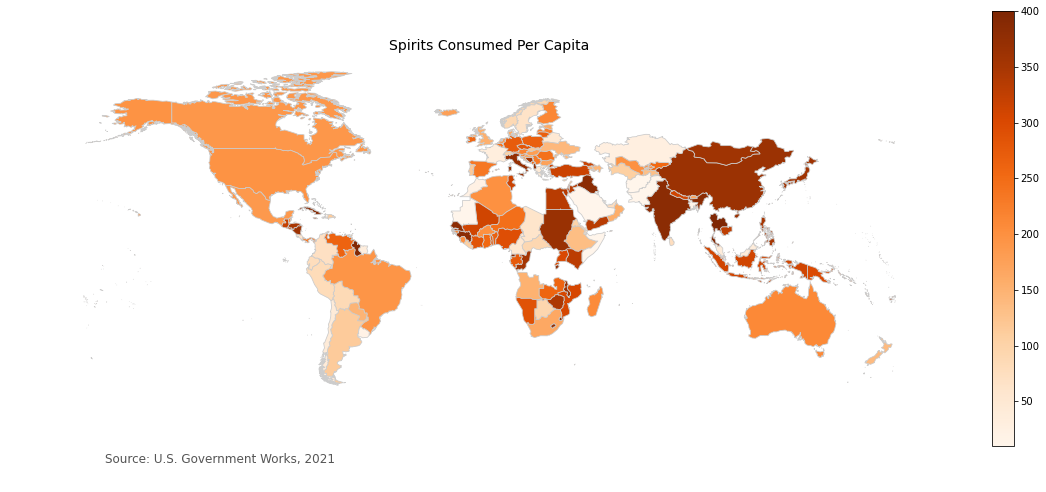

In [14]:
df_beer = df[['Country', 'Beer_PerCapita']]
merged = map_df.set_index('NAME').join(df_beer.set_index('Country'))
variable = 'Beer_PerCapita'
# set the range for the choropleth
vmin, vmax = 10, 400

fig, ax = plt.subplots(1, figsize=(20, 8))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')
ax.set_title('Spirits Consumed Per Capita', fontdict={'fontsize': '14', 'fontweight' : '1'})
ax.annotate('Source: U.S. Government Works, 2021',xy=(0.1, .08), 
             xycoords='figure fraction', horizontalalignment='left', 
             verticalalignment='top', fontsize=12, color='#555555');
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Wine Per Capita By Country - Map

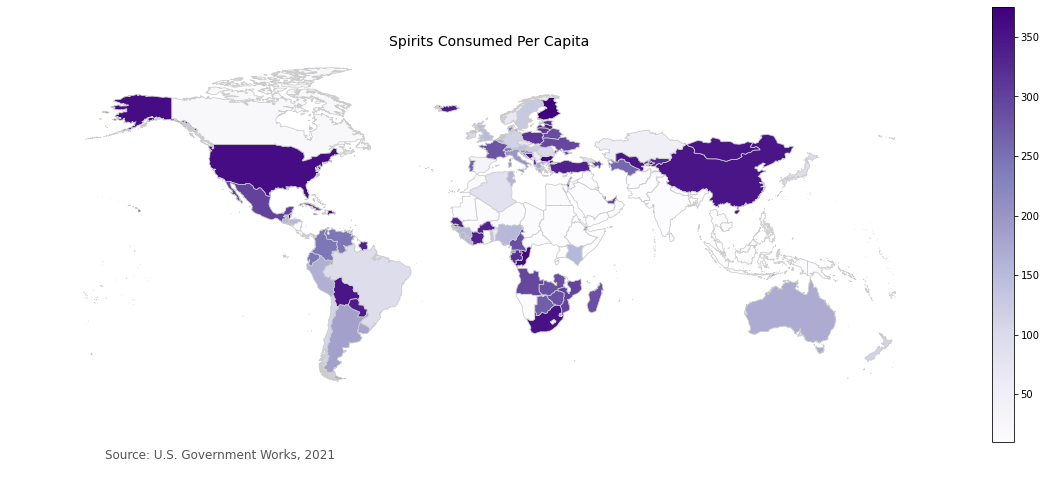

In [15]:
df_wine = df[['Country', 'Wine_PerCapita']]
merged = map_df.set_index('NAME').join(df_wine.set_index('Country'))

variable = 'Wine_PerCapita'
# set the range for the choropleth
vmin, vmax = 10, 375

fig, ax = plt.subplots(1, figsize=(20, 8))
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')
ax.set_title('Spirits Consumed Per Capita', fontdict={'fontsize': '14', 'fontweight' : '1'})
ax.annotate('Source: U.S. Government Works, 2021',xy=(0.1, .08), 
             xycoords='figure fraction', horizontalalignment='left', 
             verticalalignment='top', fontsize=12, color='#555555');
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)